# OneClass SVM
This notebook will introduce the OneClass SVM and the results obtained

In [1]:
import helpers

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import OneClassSVM

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

from itertools import combinations

from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

## Train model

In [2]:
X_train, X_test, scaler= helpers.get_healthy_matrixes()
X_other,_,_= helpers.get_other_matrixes(scaler)

['1_10_05A.csv', '1_10_1A.csv', '1_10_2A.csv', '1_10_3A.csv', '1_1_05A.csv', '1_1_1A.csv', '1_1_2A.csv', '1_1_3A.csv', '1_2_05A.csv', '1_2_1A.csv', '1_2_2A.csv', '1_2_3A.csv', '1_3_05A.csv', '1_3_1A.csv', '1_3_2A.csv', '1_3_3A.csv', '1_4_05A.csv', '1_4_1A.csv', '1_4_2A.csv', '1_4_3A.csv', '1_5_05A.csv', '1_5_1A.csv', '1_5_2A.csv', '1_5_3A.csv', '1_6_05A.csv', '1_6_1A.csv', '1_6_2A.csv', '1_6_3A.csv', '1_7_05A.csv', '1_7_1A.csv', '1_7_2A.csv', '1_7_3A.csv', '1_8_05A.csv', '1_8_1A.csv', '1_8_2A.csv', '1_8_3A.csv', '1_9_05A.csv', '1_9_1A.csv', '1_9_2A.csv', '1_9_3A.csv']
Getting data from file 1_10_05A.csv with shape (16517, 24)
Getting data from file 1_10_1A.csv with shape (16517, 24)
Getting data from file 1_10_2A.csv with shape (16517, 24)
Getting data from file 1_10_3A.csv with shape (16517, 24)
Getting data from file 1_1_05A.csv with shape (16517, 24)
Getting data from file 1_1_1A.csv with shape (16517, 24)
Getting data from file 1_1_2A.csv with shape (16517, 24)
Getting data from fi

In [3]:
train=helpers.get_features(X_train)
test=helpers.get_features(X_test)
other=helpers.get_features(X_other)

/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: divide by zero encountered in log
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))
/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: invalid value encountered in multiply
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))


In [4]:
df_train=pd.DataFrame(train,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])
df_test=pd.DataFrame(test,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])
df_other=pd.DataFrame(other,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])

In [5]:
clf = OneClassSVM(kernel='sigmoid').fit(train)

In [6]:
train_res=clf.predict(train)
test_res=clf.predict(test)
other_res=clf.predict(other)

In [7]:
np.unique(train_res,return_counts=True)

(array([-1,  1]), array([1328, 1328]))

In [8]:
np.unique(test_res,return_counts=True)

(array([-1,  1]), array([344, 320]))

In [9]:
np.unique(other_res,return_counts=True)

(array([-1,  1]), array([2948,  372]))

train:(array([-1,  1]), array([ 133, 2523]))
test:(array([-1,  1]), array([ 31, 633]))
other:(array([-1,  1]), array([1009, 2311]))


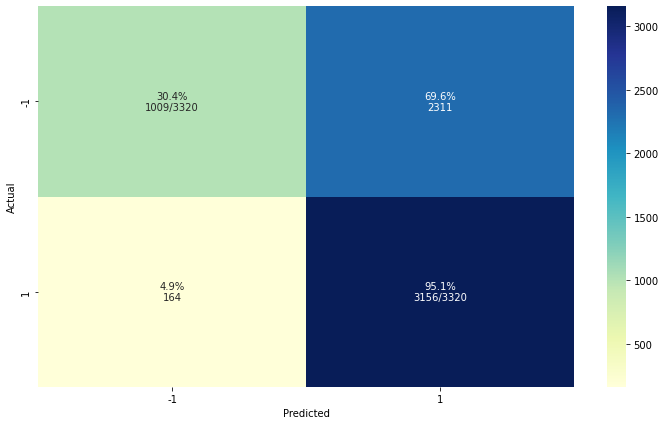

In [10]:
dict_for_test={"train":df_train,"test":df_test,"other":df_other}
dict_test_expected={"train":1,"test":1,"other":-1}
helpers.train_predict_SVM(df_train,dict_for_test,dict_test_expected,["mean","std"])

In [11]:
params_l, tol_l, nu_l, gamma_l, acc_l= [], [], [], [], []

for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        for gamma in ["scale","auto"]:
            for tol in [0.01, 0.001, 0.0001]:   
                for nu in [0.0001, 0.01, 0.1, 0.25]:
                    results, cm, acc = helpers.train_predict_SVM_noshow(df_train,dict_for_test, dict_test_expected,list(params),nu=nu, tol=tol)
                    tol_l.append(tol)
                    nu_l.append(nu)
                    gamma_l.append(gamma)
                    acc_l.append(acc)
                    params_l.append(params)
res_rbf = pd.DataFrame({"params": params_l, "tol": tol_l, "nu": nu_l, "gamma": gamma_l, "accuracy": acc_l})

OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 

OneClassSVM ['mean', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt'] kernel=rbf, nu = 

OneClassSVM ['kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp'] kernel=rbf, nu = 0.1
OneClassSV

OneClassSVM ['rms', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms',

OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'kurt'] kernel=rbf, nu = 0.0001
OneClass

OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClass

OneClassSVM ['mean', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf

OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneC

OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'ent'] kernel=rb

OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'p

OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'zp'] kernel=rbf

OneClassSVM ['kurt', 'pp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'zp', 'cf'] kernel=rbf, nu = 0.0001
One

OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'z

OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.25


In [12]:
params_l, tol_l, nu_l, gamma_l, acc_l= [], [], [], [], []
for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        for gamma in ["scale","auto"]:
            for tol in [0.01, 0.001, 0.0001]:   
                for nu in  [0.0001, 0.01, 0.1, 0.25]:
                    results, cm, acc = helpers.train_predict_SVM_noshow(df_train,dict_for_test, dict_test_expected,list(params),kernel="sigmoid", nu=nu, tol=tol)
                    tol_l.append(tol)
                    nu_l.append(nu)
                    gamma_l.append(gamma)
                    acc_l.append(acc)
                    params_l.append(params)
res_sig = pd.DataFrame({"params": params_l, "tol": tol_l, "nu": nu_l, "gamma": gamma_l, "accuracy": acc_l})

OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', '

OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'k

OneClassSVM ['std', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms']

OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'cf'] kernel=sigmoid, nu = 0.01
OneCla

OneClassSVM ['zp', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['zp', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['zp', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM 

OneClassSVM ['mean', 'std', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'std', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'std', 'cf'] ke

OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'kurt', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'kurt', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'kurt', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mea

OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['mean', 'pp', 'zp'] kernel=sigmoid, nu 

OneClassSVM ['mean', 'cf', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'kurt', 'rms'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', '

OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'rms', 'pp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'rms', 'zp'] kernel=sigmoid, nu 

OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'pp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['std', 'zp', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['std', 'zp', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['std', 'zp', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['std', 'zp', 'cf'] kernel=sigmoid, nu = 0.

OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'rms', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'rms', 'cf'] ke

OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['kurt', 'zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['kurt', 'zp', 'ent'] ke

OneClassSVM ['rms', 'zp', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp', 'cf'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp', 'cf'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp', 'cf'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['rms', 'zp', 'ent'] kernel=sigmoid, nu = 0.2

OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.25
OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.0001
OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.01
OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.1
OneClassSVM ['zp', 'cf', 'ent'] kernel=sigmoid, nu = 0.25


In [15]:
params_l, tol_l, nu_l, gamma_l, acc_l, = [], [], [], [], []
for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        for gamma in ["scale","auto"]:
             for tol in [0.01, 0.001, 0.0001]:   
                for nu in  [0.0001, 0.01, 0.1, 0.25]:
                    results, cm, acc = helpers.train_predict_SVM_noshow(df_train,dict_for_test, dict_test_expected,list(params),kernel="poly", nu=nu, tol=tol)
                    tol_l.append(tol)
                    nu_l.append(nu)
                    gamma_l.append(gamma)
                    acc_l.append(acc)
                    params_l.append(params)
res_poly = pd.DataFrame({"params": params_l, "tol": tol_l, "nu": nu_l, "gamma": gamma_l,"accuracy": acc_l})

OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std'

OneClassSVM ['mean', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt'

OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'rms'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'pp'] kernel=pol

OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=poly, nu = 0.25
OneClas

OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std', 'kurt'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std', 'kurt'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std', 'kurt'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std', 'kurt'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std', 'kurt'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std', 'kurt'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std', 'kurt'] kernel=poly, nu 

OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'std', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'kurt', 'rms'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'rms'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'kurt', 'rms'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'kurt', 'rms'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'kurt', 'rms'] kernel=poly, nu = 0.0001
One

OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'rms', 'pp'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'rms

OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['mean', 'zp', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['mean', 'zp',

OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'kurt', 'zp'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'kurt', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'kurt

OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'rms', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'pp', 'zp'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'pp', '

OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['std', 'cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'rms', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'pp'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'rms', 'pp'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'rms', 'pp'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'rms', 'pp'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'pp'] ker

OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'pp', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['kurt', 'pp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['kurt', 'pp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['kurt', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'ent'] ker

OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'pp', 'cf'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['rms', 'pp', 'ent'] kernel=poly, nu =

OneClassSVM ['pp', 'zp', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['pp', 'zp', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['pp', 'zp', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['pp', 'zp', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.01
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.1
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.25
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=poly, nu = 0.01
OneC

In [16]:
res_rbf.describe()

,tol,nu,accuracy
count,2016.000000,2016.000000,2016.000000
mean,0.003700,0.090025,0.838735
std,0.004471,0.100252,0.125163
min,0.000100,0.000100,0.500000
25%,0.000100,0.007525,0.747741
50%,0.001000,0.055000,0.871762
75%,0.010000,0.137500,0.948946
max,0.010000,0.250000,1.000000


In [17]:
res_sig.describe()

,tol,nu,accuracy
count,2016.000000,2016.000000,2016.000000
mean,0.003700,0.090025,0.697055
std,0.004471,0.100252,0.153147
min,0.000100,0.000100,0.379669
25%,0.000100,0.007525,0.600904
50%,0.001000,0.055000,0.647289
75%,0.010000,0.137500,0.823758
max,0.010000,0.250000,1.000000


In [18]:
res_poly.describe()

,tol,nu,accuracy
count,2016.000000,2016.000000,2016.000000
mean,0.003700,0.090025,0.728281
std,0.004471,0.100252,0.155151
min,0.000100,0.000100,0.531928
25%,0.000100,0.007525,0.615173
50%,0.001000,0.055000,0.648494
75%,0.010000,0.137500,0.874849
max,0.010000,0.250000,1.000000


In [19]:
res_rbf.sort_values(by="accuracy", ascending=False)[0:40]

,params,tol,nu,gamma,accuracy
640,"(zp, ent)",0.0010,0.0001,auto,1.000000
636,"(zp, ent)",0.0100,0.0001,auto,1.000000
632,"(zp, ent)",0.0001,0.0001,scale,1.000000
2008,"(zp, cf, ent)",0.0010,0.0001,auto,1.000000
628,"(zp, ent)",0.0010,0.0001,scale,1.000000
2004,"(zp, cf, ent)",0.0100,0.0001,auto,1.000000
644,"(zp, ent)",0.0001,0.0001,auto,1.000000
2012,"(zp, cf, ent)",0.0001,0.0001,auto,1.000000
1992,"(zp, cf, ent)",0.0100,0.0001,scale,1.000000
624,"(zp, ent)",0.0100,0.0001,scale,1.000000


In [20]:
res_sig.sort_values(by="accuracy", ascending=False)[0:40]

,params,tol,nu,gamma,accuracy
164,"(mean, ent)",0.0001,0.0001,auto,1.000000
524,"(rms, ent)",0.0001,0.0001,auto,1.000000
1772,"(kurt, cf, ent)",0.0001,0.0001,auto,1.000000
1760,"(kurt, cf, ent)",0.0001,0.0001,scale,1.000000
296,"(std, ent)",0.0001,0.0001,scale,1.000000
152,"(mean, ent)",0.0001,0.0001,scale,1.000000
308,"(std, ent)",0.0001,0.0001,auto,1.000000
512,"(rms, ent)",0.0001,0.0001,scale,1.000000
1016,"(mean, rms, ent)",0.0001,0.0001,scale,1.000000
1028,"(mean, rms, ent)",0.0001,0.0001,auto,1.000000


In [21]:
res_poly.sort_values(by="accuracy", ascending=False)[0:40]

,params,tol,nu,gamma,accuracy
152,"(mean, ent)",0.0001,0.0001,scale,1.000000
512,"(rms, ent)",0.0001,0.0001,scale,1.000000
524,"(rms, ent)",0.0001,0.0001,auto,1.000000
164,"(mean, ent)",0.0001,0.0001,auto,1.000000
508,"(rms, ent)",0.0010,0.0001,scale,1.000000
160,"(mean, ent)",0.0010,0.0001,auto,1.000000
156,"(mean, ent)",0.0100,0.0001,auto,1.000000
504,"(rms, ent)",0.0100,0.0001,scale,1.000000
1508,"(std, zp, ent)",0.0001,0.0001,auto,1.000000
1504,"(std, zp, ent)",0.0010,0.0001,auto,1.000000


In [23]:
results, cm, acc = helpers.train_predict_SVM_noshow(df_train,dict_for_test, dict_test_expected,["zp","ent"],kernel="rbf", nu=0.0001, tol=0.001)

OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.0001


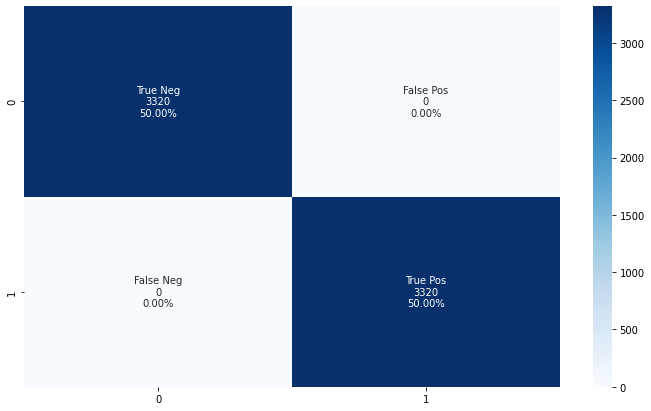

In [24]:
helpers.plot_cm2(cm)

In [25]:
results

{'train': (array([1]), array([2656])),
 'test': (array([1]), array([664])),
 'other': (array([-1]), array([3320]))}

In [26]:
acc

1.0

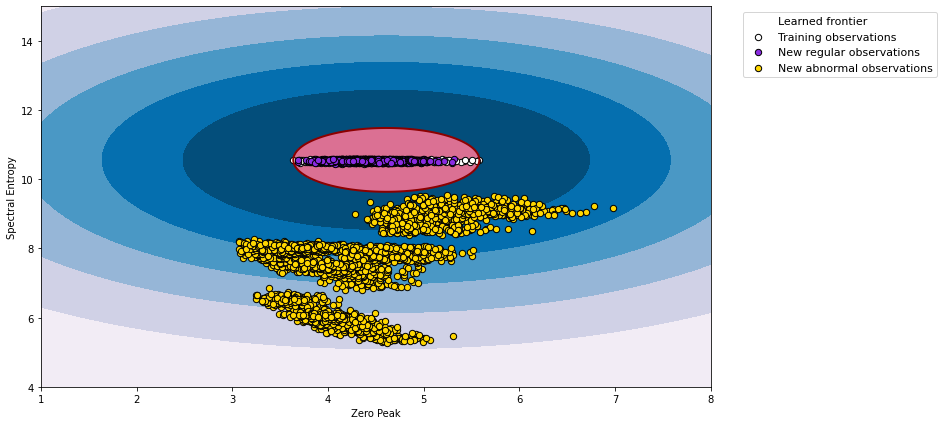

In [27]:
xx, yy = np.meshgrid(np.linspace(1, 8, 500), np.linspace(4, 15, 500))

# fit the model
clf =OneClassSVM(kernel="rbf", gamma="scale", tol=0.0001, nu=0.0001).fit(df_train[["zp", "ent"]])
y_pred_train = clf.predict(df_train[["zp", "ent"]])
y_pred_test = clf.predict(dict_for_test["test"][["zp", "ent"]])
y_pred_outliers = clf.predict(dict_for_test["other"][["zp", "ent"]])
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(df_train[["zp"]], df_train[["ent"]], c="white", s=s, edgecolors="k")
b2 = plt.scatter(dict_for_test["test"][["zp"]], dict_for_test["test"][["ent"]], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(dict_for_test["other"][["zp"]], dict_for_test["other"][["ent"]], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlabel("Zero Peak")
plt.ylabel("Spectral Entropy")
plt.xlim((1,8))
plt.ylim((4, 15))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "Learned frontier",
        "Training observations",
        "New regular observations",
        "New abnormal observations",
    ],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.show()

In [28]:
X_replica ,_,_=helpers.get_replica_matrixes(scaler)
replica=helpers.get_features(X_replica)
df_replica=pd.DataFrame(replica,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])

['2_1_1A.csv', '2_2_1A.csv', '2_3_1A.csv', '2_4_1A.csv', '2_5_1A.csv']
Getting data from file 2_1_1A.csv with shape (16517, 24)
Getting data from file 2_2_1A.csv with shape (16517, 24)
Getting data from file 2_3_1A.csv with shape (16517, 24)
Getting data from file 2_4_1A.csv with shape (16517, 24)
Getting data from file 2_5_1A.csv with shape (16517, 24)
Reshaping []data with shape (24, 82585) to (415, 4776), with k=199, len(data[0])/k=82585/199=415.0 samples
['2_1_2A.csv', '2_2_2A.csv', '2_3_2A.csv', '2_4_2A.csv', '2_5_2A.csv']
Getting data from file 2_1_2A.csv with shape (16517, 24)
Getting data from file 2_2_2A.csv with shape (16517, 24)
Getting data from file 2_3_2A.csv with shape (16517, 24)
Getting data from file 2_4_2A.csv with shape (16517, 24)
Getting data from file 2_5_2A.csv with shape (16517, 24)
Reshaping []data with shape (24, 82585) to (415, 4776), with k=199, len(data[0])/k=82585/199=415.0 samples
['2_1_3A.csv', '2_2_3A.csv', '2_3_3A.csv', '2_4_3A.csv', '2_5_3A.csv']
Get

/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: divide by zero encountered in log
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))
/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: invalid value encountered in multiply
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))


In [29]:
dict_for_test={"train":df_train,"test":df_replica,"other":df_other}
dict_test_expected={"train":1,"test":1,"other":1}
results, cm, acc = helpers.train_predict_SVM_noshow(df_train,dict_for_test, dict_test_expected,["zp","ent"],gamma="scale", nu=0.0001, tol=0.001)

OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.0001


In [30]:
cm

array([[2656]])

In [31]:
acc

0.34782608695652173

In [32]:
results

{'train': (array([1]), array([2656])),
 'test': (array([-1]), array([1660])),
 'other': (array([-1]), array([3320]))}

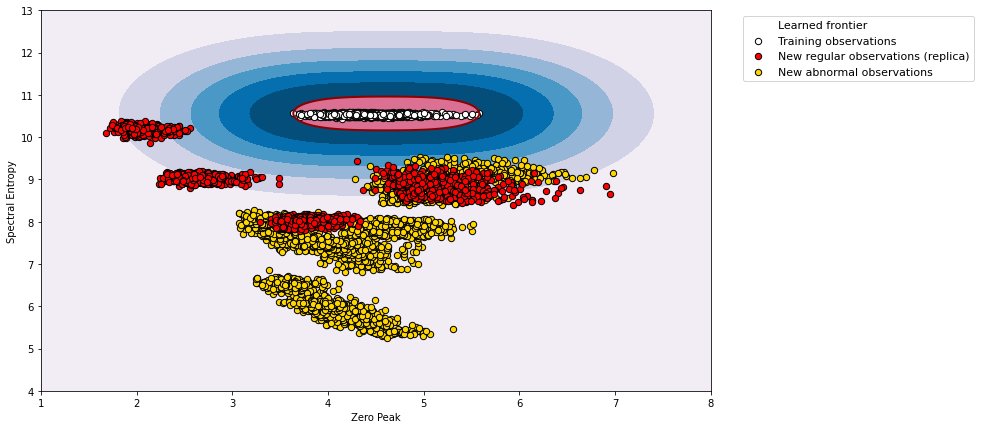

In [33]:
xx, yy = np.meshgrid(np.linspace(1, 8, 500), np.linspace(4, 13, 500))

# fit the model
clf =OneClassSVM(kernel="rbf", gamma=gamma, tol=0.0001, nu=0.0001).fit(df_train[["zp", "ent"]])
y_pred_train = clf.predict(df_train[["zp", "ent"]])
y_pred_test = clf.predict(dict_for_test["test"][["zp", "ent"]])
y_pred_outliers = clf.predict(dict_for_test["other"][["zp", "ent"]])
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(df_train[["zp"]], df_train[["ent"]], c="white", s=s, edgecolors="k")
c = plt.scatter(dict_for_test["other"][["zp"]], dict_for_test["other"][["ent"]], c="gold", s=s, edgecolors="k")
b2 = plt.scatter(dict_for_test["test"][["zp"]], dict_for_test["test"][["ent"]], c="red", s=s, edgecolors="k")

plt.axis("tight")
plt.xlabel("Zero Peak")
plt.ylabel("Spectral Entropy")
plt.xlim((1,8))
plt.ylim((4, 13))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "Learned frontier",
        "Training observations",
        "New regular observations (replica)",
        "New abnormal observations",
    ],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.show()

In [34]:
df_replica_train, df_replica_test=helpers.train_test_split(df_replica, test_size=0.2)
dict_for_test={"train":df_replica_train,"test":df_replica_test,"other":df_other}
dict_test_expected={"train":1,"test":1,"other":-1}

In [35]:
params_l, tol_l, nu_l, gamma_l, acc_l= [], [], [], [], []
for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        for gamma in ["scale","auto"]:
            for tol in [0.1, 0.01, 0.001, 0.0001]:   
                for nu in  [0.0001, 0.01, 0.1, 0.25]:
                    results, cm, acc = helpers.train_predict_SVM_noshow(df_replica_train,dict_for_test, dict_test_expected,list(params),nu=nu, tol=tol)
                    tol_l.append(tol)
                    nu_l.append(nu)
                    gamma_l.append(gamma)
                    acc_l.append(acc)
                    params_l.append(params)
res_rbf = pd.DataFrame({"params": params_l, "tol": tol_l, "nu": nu_l, "gamma": gamma_l, "accuracy": acc_l})

OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std'] kernel=rbf, nu = 

OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['m

OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'cf'] kernel=rb

OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['k

OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['r

OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['cf', 'ent'] kernel=rb

OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'std', 'zp'] kernel=rbf,

OneClassSVM ['mean', 'kurt', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'kurt', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'kurt'

OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'rms', 'zp'] kernel=rbf

OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['mean', 'pp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['mean', 'pp', 'ent'] kernel=r

OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'rms'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'kurt', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'kurt', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'kurt', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'kurt', 'p

OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneC

OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'pp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'p

OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['std', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'rms', 'pp'] kernel=rbf, nu =

OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'pp', 'zp'] kernel=rbf, nu = 0.01
OneC

OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['kurt', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['kurt', 'cf', 'ent'] kernel=r

OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'cf'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['rms', 'zp', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM 

OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.1
OneClassSVM ['pp', 'cf', 'ent'] kernel=rbf, nu = 0.25
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.0001
OneClassSVM ['zp', 'cf', 'ent'] kernel=rbf, nu = 0.01
OneClassSVM ['zp', 'cf

In [36]:
res_rbf.describe()

,tol,nu,accuracy
count,2688.000000,2688.000000,2688.000000
mean,0.027775,0.090025,0.560905
std,0.041886,0.100246,0.146449
min,0.000100,0.000100,0.284739
25%,0.000775,0.007525,0.402962
50%,0.005500,0.055000,0.596185
75%,0.032500,0.137500,0.665060
max,0.100000,0.250000,0.886747


In [37]:
res_rbf.sort_values(by="accuracy", ascending=False)

,params,tol,nu,gamma,accuracy
60,"(mean, kurt)",0.0001,0.0001,auto,0.886747
44,"(mean, kurt)",0.0001,0.0001,scale,0.886747
54,"(mean, kurt)",0.0100,0.1000,auto,0.876506
38,"(mean, kurt)",0.0100,0.1000,scale,0.876506
58,"(mean, kurt)",0.0010,0.1000,auto,0.876305
...,...,...,...,...,...
2372,"(rms, pp, zp)",0.0100,0.0001,scale,0.294980
1876,"(std, pp, zp)",0.0100,0.0001,auto,0.294980
596,"(rms, pp)",0.0100,0.0001,auto,0.294980
1428,"(mean, pp, cf)",0.0100,0.0001,auto,0.284739


In [38]:
results, cm, acc = helpers.train_predict_SVM_noshow(df_replica_train,dict_for_test, dict_test_expected,["mean","kurt"],nu=0.0001, tol=0.0001)

OneClassSVM ['mean', 'kurt'] kernel=rbf, nu = 0.0001


In [39]:
results

{'train': (array([-1,  1]), array([   5, 1323])),
 'test': (array([-1,  1]), array([  9, 323])),
 'other': (array([-1,  1]), array([2770,  550]))}

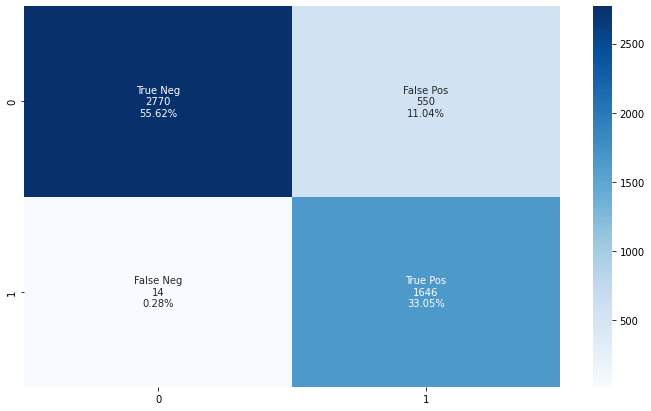

In [40]:
helpers.plot_cm2(cm)

In [41]:
acc

0.8867469879518072

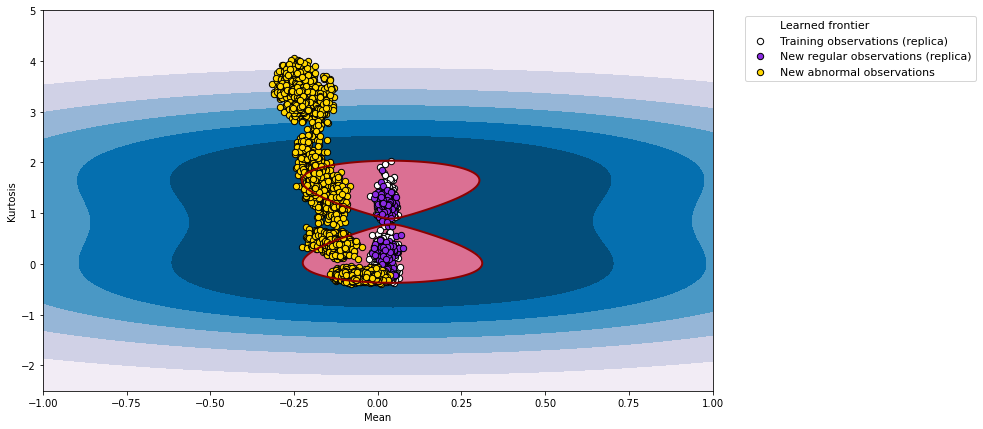

In [42]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-2.5, 5, 500))

# fit the model
clf =OneClassSVM(kernel="rbf", gamma=gamma, tol=0.0001, nu=0.0001).fit(df_replica_train[["mean", "kurt"]])
y_pred_train = clf.predict(df_replica_train[["mean", "kurt"]])
y_pred_test = clf.predict(dict_for_test["test"][["mean", "kurt"]])
y_pred_outliers = clf.predict(dict_for_test["other"][["mean", "kurt"]])
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(df_replica_train[["mean"]], df_replica_train[["kurt"]], c="white", s=s, edgecolors="k")
b2 = plt.scatter(dict_for_test["test"][["mean"]], dict_for_test["test"][["kurt"]], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(dict_for_test["other"][["mean"]], dict_for_test["other"][["kurt"]], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlabel("Mean")
plt.ylabel("Kurtosis")
plt.xlim((-1,1))
plt.ylim((-2.5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "Learned frontier",
        "Training observations (replica)",
        "New regular observations (replica)",
        "New abnormal observations",
    ],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.show()

In [43]:
results, cm, acc = helpers.train_predict_SVM_noshow(df_replica_train,dict_for_test, dict_test_expected,["zp","ent"],gamma="auto", nu=0.0001, tol=0.0001)

OneClassSVM ['zp', 'ent'] kernel=rbf, nu = 0.0001


In [44]:
results

{'train': (array([-1,  1]), array([   5, 1323])),
 'test': (array([-1,  1]), array([  5, 327])),
 'other': (array([-1,  1]), array([1989, 1331]))}

In [45]:
acc

0.730722891566265

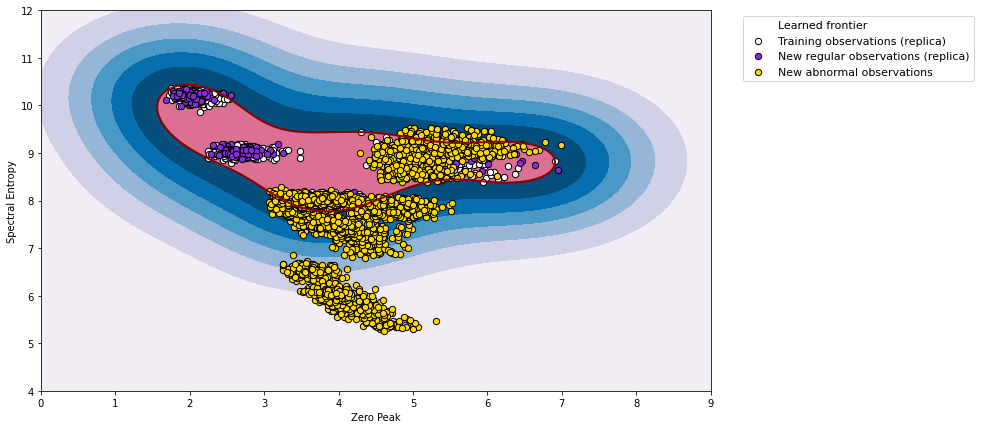

In [50]:
xx, yy = np.meshgrid(np.linspace(0, 9, 500), np.linspace(4, 12, 500))

# fit the model
clf =OneClassSVM(kernel="rbf", gamma=gamma, tol=0.0001, nu=0.0001).fit(df_replica_train[["zp", "ent"]])
y_pred_train = clf.predict(dict_for_test["train"][["zp", "ent"]])
y_pred_test = clf.predict(dict_for_test["test"][["zp", "ent"]])
y_pred_outliers = clf.predict(dict_for_test["other"][["zp", "ent"]])
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(df_replica_train[["zp"]], df_replica_train[["ent"]], c="white", s=s, edgecolors="k")
b2 = plt.scatter(dict_for_test["test"][["zp"]], dict_for_test["test"][["ent"]], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(dict_for_test["other"][["zp"]], dict_for_test["other"][["ent"]], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlabel("Zero Peak")
plt.ylabel("Spectral Entropy")
plt.xlim((0,9))
plt.ylim((4, 12))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "Learned frontier",
        "Training observations (replica)",
        "New regular observations (replica)",
        "New abnormal observations",
    ],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.show()